## 1.4.10 Histograms in OpenCV

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('test.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [4]:
print(np.transpose(hist))

[[0.000e+00 1.000e+00 0.000e+00 1.000e+00 4.000e+00 1.300e+01 1.600e+01
  1.600e+01 9.000e+00 3.300e+01 2.600e+01 3.300e+01 3.100e+01 3.100e+01
  4.600e+01 5.100e+01 5.500e+01 5.500e+01 8.900e+01 9.600e+01 9.700e+01
  1.010e+02 1.220e+02 1.190e+02 1.020e+02 9.200e+01 9.900e+01 9.900e+01
  1.130e+02 1.390e+02 1.160e+02 1.510e+02 1.430e+02 1.280e+02 1.100e+02
  9.600e+01 9.500e+01 1.010e+02 9.800e+01 1.070e+02 9.300e+01 9.900e+01
  8.700e+01 1.180e+02 1.070e+02 1.040e+02 1.210e+02 1.120e+02 1.200e+02
  1.510e+02 1.870e+02 1.650e+02 1.690e+02 2.000e+02 2.030e+02 2.350e+02
  1.940e+02 2.210e+02 2.200e+02 2.620e+02 2.450e+02 2.440e+02 2.510e+02
  2.850e+02 3.120e+02 3.510e+02 4.170e+02 4.310e+02 4.530e+02 5.020e+02
  5.680e+02 5.720e+02 6.010e+02 6.080e+02 5.810e+02 6.110e+02 6.770e+02
  6.560e+02 6.750e+02 6.750e+02 8.090e+02 7.380e+02 7.170e+02 7.530e+02
  7.360e+02 7.660e+02 7.320e+02 6.730e+02 6.960e+02 7.020e+02 6.760e+02
  6.980e+02 7.270e+02 7.190e+02 7.120e+02 6.680e+02 6.980e+02 6.

In [5]:
hist = np.bincount(img.ravel(),minlength=256)

In [6]:
from matplotlib import pyplot as plt

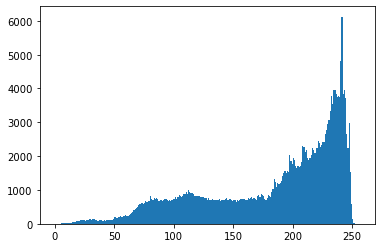

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [8]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

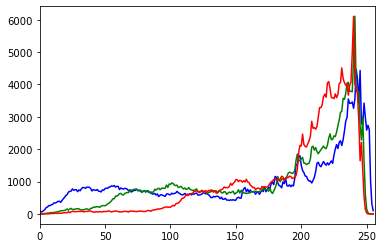

In [9]:
img = cv2.imread('test.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

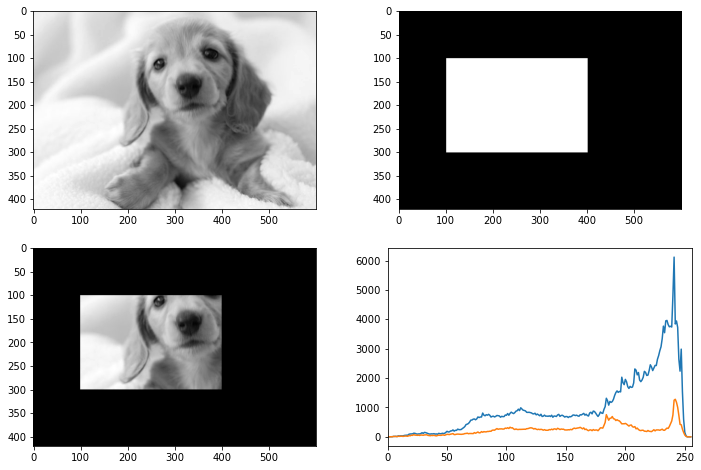

In [10]:
img = cv2.imread('test.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

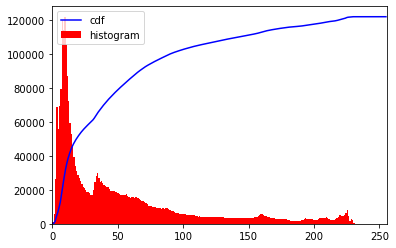

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('50493225398_667d3a7090_o.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [12]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [13]:
img2 = cdf[img]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2363c5bb3a0>)

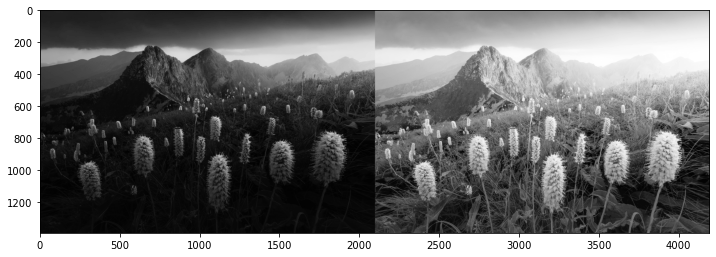

In [14]:
img = cv2.imread('50493225398_667d3a7090_o.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.figure(figsize=(12,8))
plt.subplot(111), plt.imshow(res, 'gray')